# Candlestick with mplfinance

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


%matplotlib inline
%run tick2bar.ipynb


from typing import List

import pandas as pd
import mplfinance as mpf


mpf.__version__

'0.12.7a17'

In [5]:
# mplfinance custom.
mpf_color = mpf.make_marketcolors(
    up='red',  # 上涨K线的颜色
    down='green',  # 下跌K线的颜色
    inherit=True
)

mpf_style = mpf.make_mpf_style(
    marketcolors=mpf_color,
    rc={
        'font.family': 'SimHei',       # 指定默认字体：解决plot不能显示中文问题
        'axes.unicode_minus': False,  # 解决保存图像是负号'-'显示为方块的问题
    }
)

# 画图数据
df_plot = df_1min.loc['2021-09-25 00:59:00.000000':, :]

# 调整时间戳到北京时间
df_plot.index = df_plot.index - dt.timedelta(hours=4)

# 添加瀑布线
pbx = [
    mpf.make_addplot(df_plot['PBX4'], color='k'),
    mpf.make_addplot(df_plot['PBX6'], color='b'),
    mpf.make_addplot(df_plot['PBX24'], color='r')
]

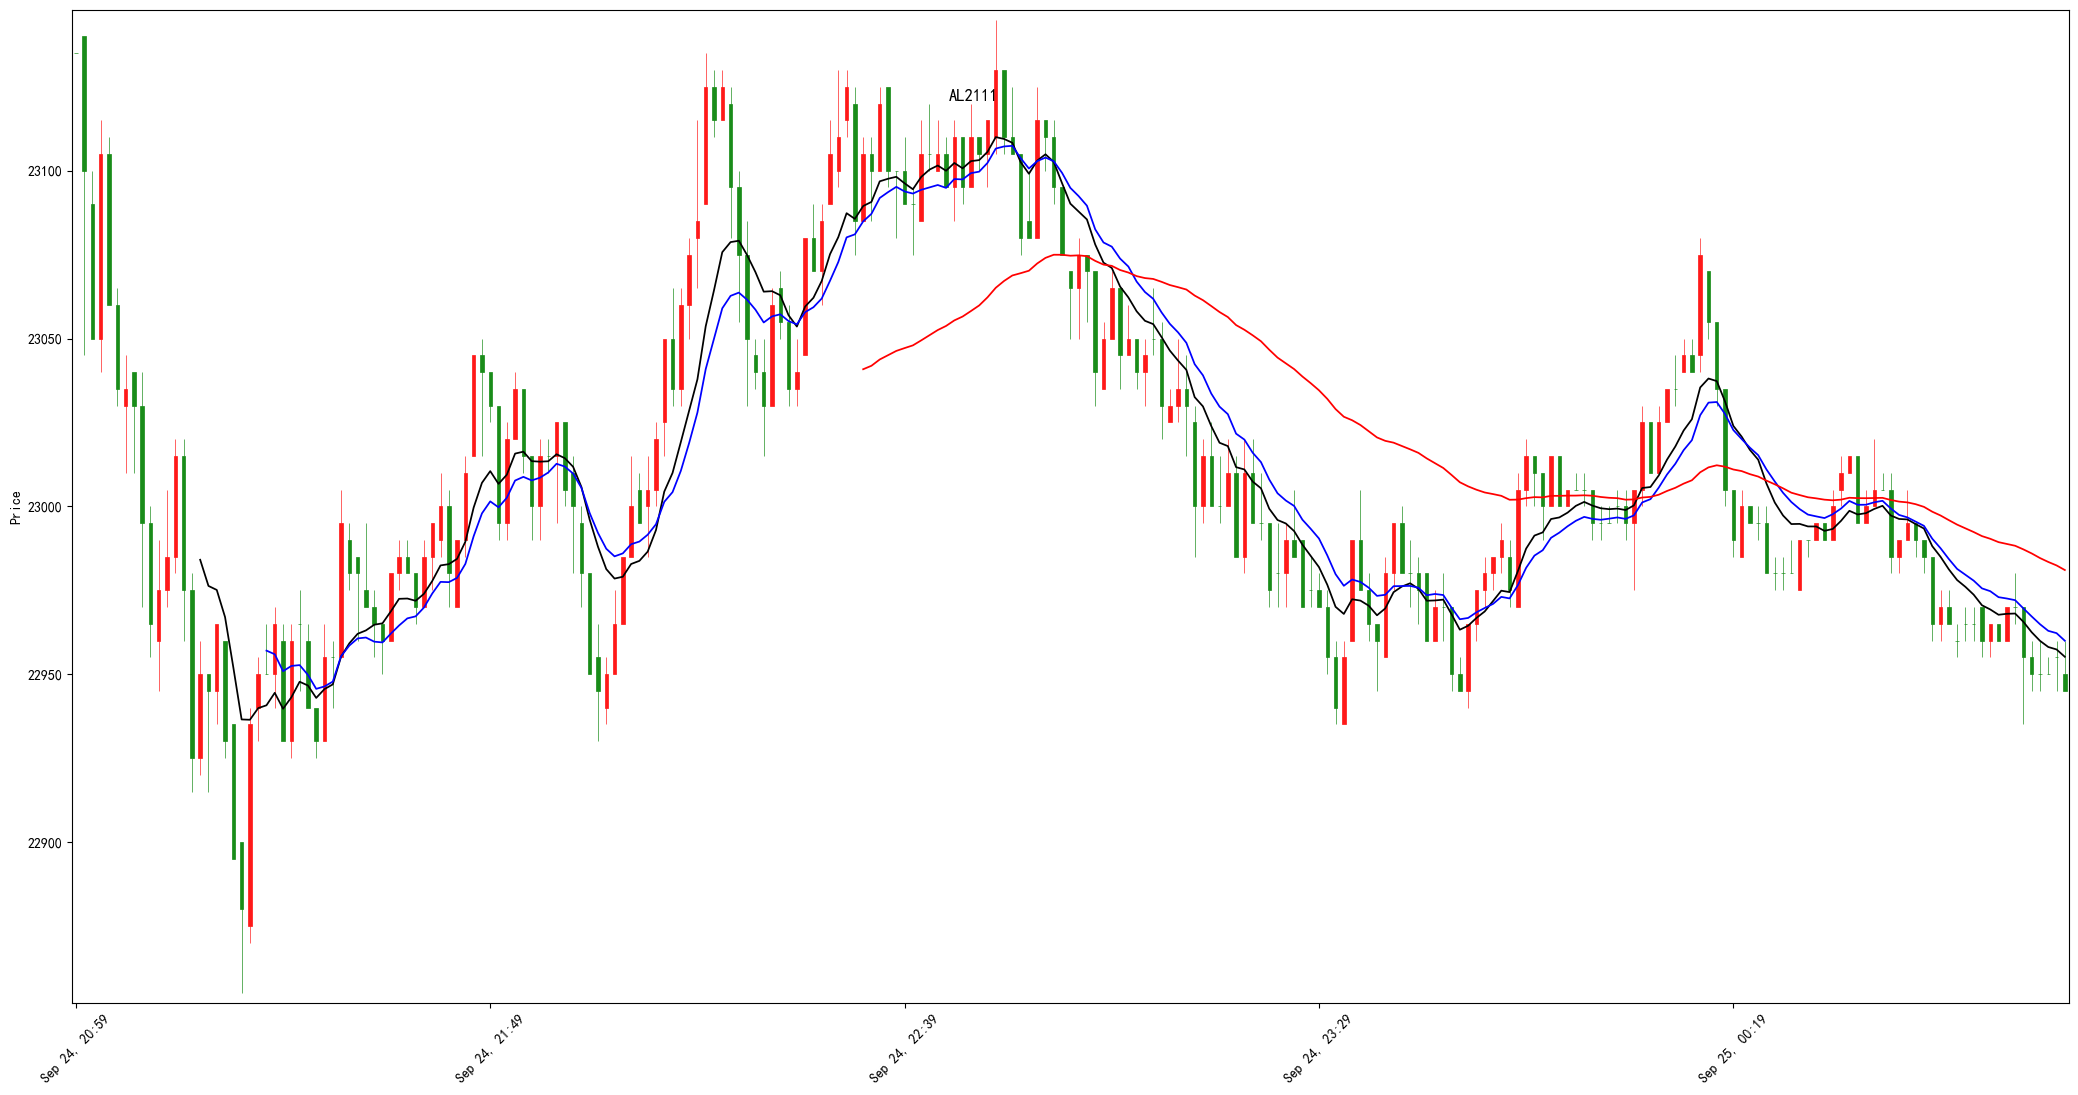

In [6]:
# 画图
mpf.plot(
    df_plot,
    addplot=pbx,
    title='AL2111',
    type='candle',
    volume=False,
    show_nontrading=False,
    # mav=(5, 10, 20, 60, 120, 240),
    figratio=(40, 20),
    figscale=2,
    style=mpf_style,
    tight_layout=True
)